As soon as you get data set. Go thr a lifecycle 
1. Handle the missing values using pandas/numpy
2. Be good at matplotlib and seaborn pandas and Numpy
3. Refer kaggle kernels for different techniques to handle missing values 
4. Now handle categorical features .explore all the techniques using internet
5. feature selection ? which one to choose as feature or select all feature?


# EDA with Python and applying Logistic Regression

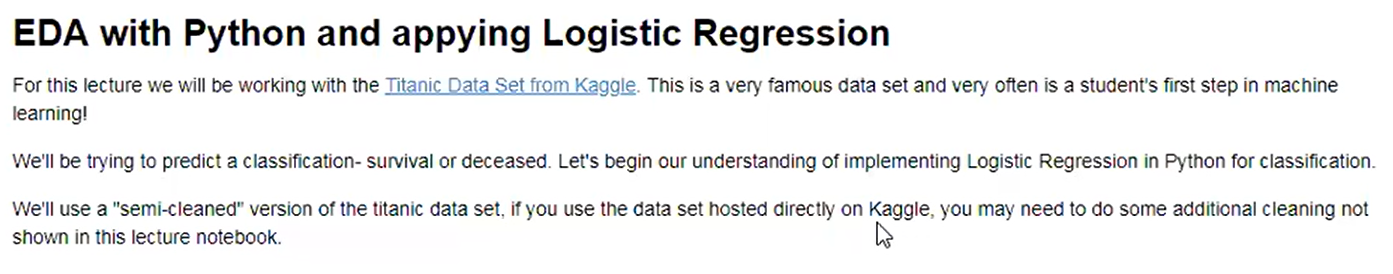

## Import all the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt
import seaborn as sns
%matplotlib inline

## Import the data

In [3]:
train=pd.read_csv('titanic3.csv')
train.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


 we will predict if the passanger has survived or not?

## Preprocess the data:

This may include handling missing values, encoding categorical variables, scaling numerical features, and removing outliers. 

### Missing data

In [4]:
train.isnull()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,False,False,False,False,True,False,False,False,False,True,False,True,True,True
1306,False,False,False,False,False,False,False,False,False,True,False,True,False,True
1307,False,False,False,False,False,False,False,False,False,True,False,True,True,True
1308,False,False,False,False,False,False,False,False,False,True,False,True,True,True


### As we can not see all the data, we will use Visualizations

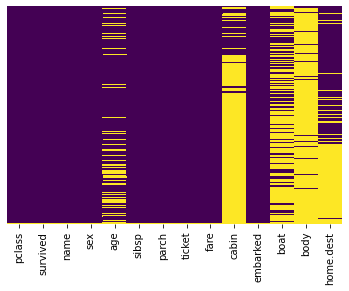

In [5]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#yticklabels = Y label are off 
#X labels are visibles as xticklabels is default ON



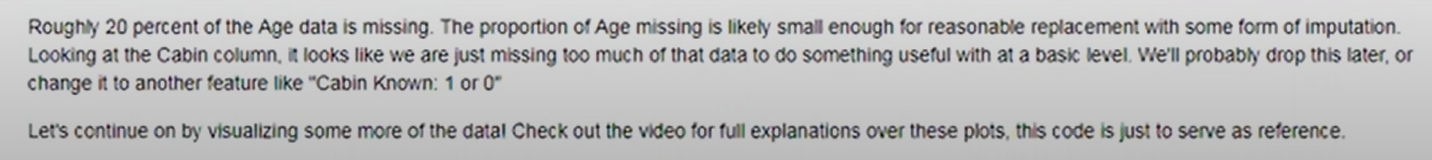

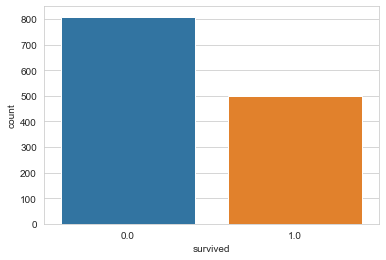

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='survived',data=train)

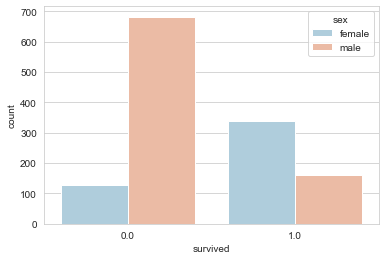

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='sex',data=train,palette='RdBu_r')

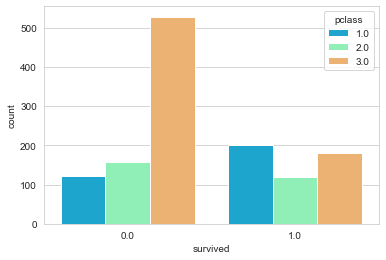

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='survived',data=train,hue='pclass',palette='rainbow')

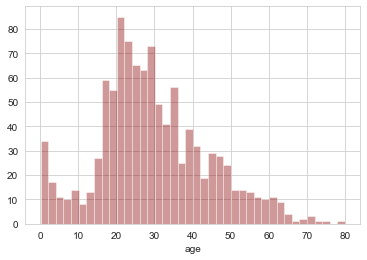

In [9]:
sns.distplot(train['age'].dropna(),kde=False,color='darkred',bins=40) # this is using sns library

#trying to see average age of the people on the ship and is it normal distribution or not

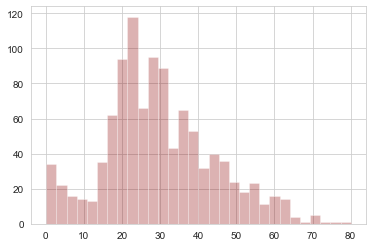

In [10]:
train['age'].hist(bins=30,color='darkred',alpha=0.3) #this is using matplotlib

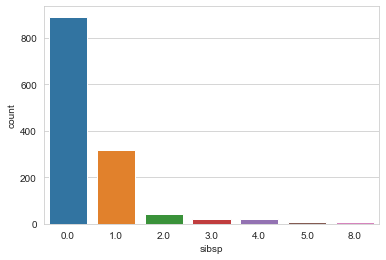

In [11]:
sns.countplot(x='sibsp',data=train)

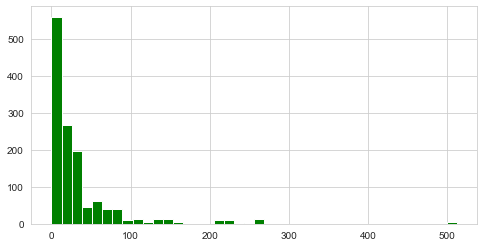

In [12]:
train['fare'].hist(color='green',bins=40,figsize=(8,4))

### Data cleaning 


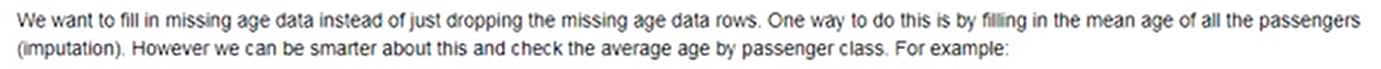

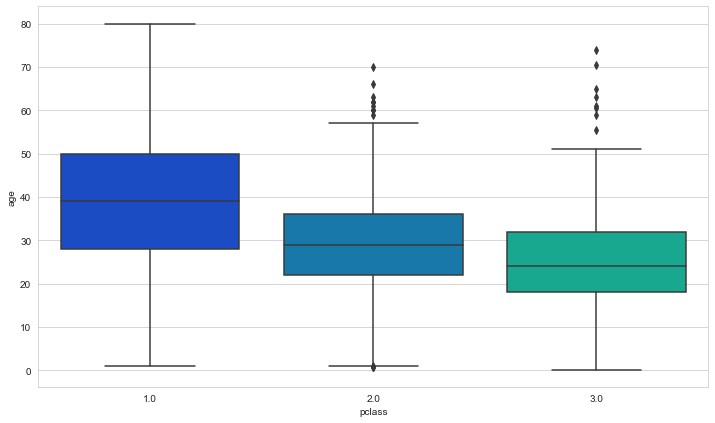

In [13]:
plt.figure(figsize=(12,7))
sns.boxplot(x='pclass',y='age',data=train,palette='winter')

In [14]:
def impute_age(cols):
    age=cols[0]
    pclass=cols[1]
    
    if pd.isnull(age):
        
        if pclass==1:
            return 37
            
        elif pclass==2:
            return 29
        
        else:
            return 24
        
    else:
        return age

Now apply above function (impute_age)

In [15]:
train['age']=train[['age','pclass']].apply(impute_age,axis=1)

now lets check the heatmap again

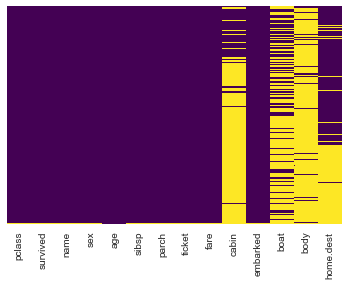

In [16]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Now, other columns has lot of null values. We can use feature engineering for it. 
But now we will be dropping the columns 

In [17]:
train.drop(['cabin','boat','body','home.dest'],axis=1,inplace=True)

In [18]:
train.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S


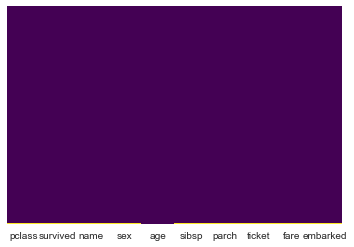

In [19]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Now we donot have null vaues

### Converting Categorical Feature

we need to convert categorical features to dummy variables using pandas. Otherwise our machine learning algo wont be able to directly take in those features as input

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   float64
 1   survived  1309 non-null   float64
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1310 non-null   float64
 5   sibsp     1309 non-null   float64
 6   parch     1309 non-null   float64
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   embarked  1307 non-null   object 
dtypes: float64(6), object(4)
memory usage: 102.5+ KB


In [21]:
pd.get_dummies(train['embarked'],drop_first=True).head()

# get_dummies: if you have 3 dummies, convets it into 3 categories or 3 columns, so we need to remove first column

,Q,S
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [22]:
sex= pd.get_dummies(train['sex'],drop_first=True).head()
embark =pd.get_dummies(train['embarked'],drop_first=True).head()

In [23]:
sex

,male
0,0
1,1
2,0
3,1
4,0


In [24]:
embark

,Q,S
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [25]:
train.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S


In [26]:
train.drop(['sex','embarked','name','ticket'], axis=1,inplace=True)

In [27]:
train=pd.concat([train,sex,embark],axis=1)

In [28]:
train.head()

,pclass,survived,age,sibsp,parch,fare,male,Q,S
0,1.0,1.0,29.0000,0.0,0.0,211.3375,0.0,0.0,1.0
1,1.0,1.0,0.9167,1.0,2.0,151.5500,1.0,0.0,1.0
2,1.0,0.0,2.0000,1.0,2.0,151.5500,0.0,0.0,1.0
3,1.0,0.0,30.0000,1.0,2.0,151.5500,1.0,0.0,1.0
4,1.0,0.0,25.0000,1.0,2.0,151.5500,0.0,0.0,1.0


In [29]:
train.drop(['male','Q','S'], axis=1,inplace=True)

In [30]:
train

,pclass,survived,age,sibsp,parch,fare
0,1.0,1.0,29.0000,0.0,0.0,211.3375
1,1.0,1.0,0.9167,1.0,2.0,151.5500
2,1.0,0.0,2.0000,1.0,2.0,151.5500
3,1.0,0.0,30.0000,1.0,2.0,151.5500
4,1.0,0.0,25.0000,1.0,2.0,151.5500
...,...,...,...,...,...,...
1305,3.0,0.0,24.0000,1.0,0.0,14.4542
1306,3.0,0.0,26.5000,0.0,0.0,7.2250
1307,3.0,0.0,27.0000,0.0,0.0,7.2250
1308,3.0,0.0,29.0000,0.0,0.0,7.8750


Now the 'survive' column is dependent feature and others are independent features

##### As I see some rows still have bad /null data. I am dropping those rows 

In [31]:
train.dropna(subset=['pclass','survived','age','sibsp','parch','fare'], inplace=True, axis=0)

In [32]:
train

,pclass,survived,age,sibsp,parch,fare
0,1.0,1.0,29.0000,0.0,0.0,211.3375
1,1.0,1.0,0.9167,1.0,2.0,151.5500
2,1.0,0.0,2.0000,1.0,2.0,151.5500
3,1.0,0.0,30.0000,1.0,2.0,151.5500
4,1.0,0.0,25.0000,1.0,2.0,151.5500
...,...,...,...,...,...,...
1304,3.0,0.0,14.5000,1.0,0.0,14.4542
1305,3.0,0.0,24.0000,1.0,0.0,14.4542
1306,3.0,0.0,26.5000,0.0,0.0,7.2250
1307,3.0,0.0,27.0000,0.0,0.0,7.2250


## Building a Logistic Regression model

lets start by splitting our data into a training set and test set 

### Split the dataset into training and testing sets

Splitting the dataset into training and testing sets allows us to train the model on one subset of the data and evaluate its performance on another subset that the model hasn't seen before. This helps assess how well the model generalizes to new, unseen data. We typically use a larger portion of the data for training (e.g., 80%) and a smaller portion for testing (e.g., 20%).

In [33]:
x = train.drop('survived',axis=1).head()   

#dependent feature /Target variable

In [36]:
y = train['survived'].head()
y

0    1.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: survived, dtype: float64

Here, X contains the features (independent variables), and y contains the target variable. The model learns from the relationship between the features (such as age, income, spending score) and the target variable (such as customer churn, disease diagnosis).

During model training, the model uses the features (X) to predict the target variable (y). It learns to make predictions by finding patterns and relationships in the data. Dropping the target variable from the dataset ensures that the model doesn't inadvertently learn from the target variable during training, which would result in overfitting.

So, to summarize, you should keep the target variable in the dataset and separate it from the features when building a machine learning model.

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

We split the data into training and testing sets using train_test_split, with 80% of the data for training and 20% for testing.

### Create a Logistic Regression model:

Logistic Regression is a popular statistical technique used for binary classification problems, where the target variable has two possible outcomes (e.g., yes/no, 1/0). 

Logistic Regression is a common algorithm used for binary classification tasks because it provides probabilities that an instance belongs to each class, making it well-suited for tasks where the outcome is binary.

In [81]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()  #This line initializes a Logistic Regression model.

### Train the model on the training data:

Training the model involves fitting it to the training data, allowing it to learn the relationships between the input features and the target variable. The model adjusts its parameters during training to minimize the difference between the actual target values and the values predicted by the model.

In [82]:
model.fit(X_train, y_train)

LogisticRegression()

### Evaluate the model's performance on the testing data

Once the model is trained, we evaluate its performance on the testing data to assess how well it generalizes to new, unseen data. Common evaluation metrics for classification models include accuracy, precision, recall, F1-score, and the confusion matrix.

In [83]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [84]:
y_pred = model.predict(X_test)

accuracy=confusion_matrix(y_test,y_pred)

accuracy

array([[1, 0],
       [1, 0]], dtype=int64)

In [85]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5


This code predicts the target variable (y_pred) based on the testing features (X_test) and calculates the accuracy of the model by comparing the predicted values with the actual values (y_test).

In [86]:
y_pred

array([0., 0.])

### Display additional evaluation metrics

In addition to accuracy, displaying additional evaluation metrics like the classification report and confusion matrix provides deeper insights into the model's performance. These metrics help understand the model's precision, recall, and ability to correctly classify instances into different classes.

In [87]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67         1
         1.0       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2


Confusion Matrix:
[[1 0]
 [1 0]]


C:\Users\shalm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


These lines display the classification report and confusion matrix, providing more detailed insights into the model's performance, such as precision, recall, F1-score, and the number of true positives, true negatives, false positives, and false negatives.